Welcome to Gotti.ai 

This notebook presents the core functionality of the application.


First we must install the required packages


In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -i https://test.pypi.org/simple/ stock-indicators==1.3.1.dev9

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


To get the historical stock data of a specific ticket we are using yahoo finance!

The below code will fetch the historical data for the stock symbol ‘AAPL’ for the last 5 days with a 1-minute interval. 


In [3]:
# Import the yfinance library
import yfinance as yf

# Function to get the ticker data
def get_ticker(stock_symbol, timespan, time):
    # Fetch data from yfinance
    ticker = yf.Ticker(stock_symbol)
    # Fetch historical data from yfinance
    data = ticker.history(period=timespan, interval=time)
    return data

# Example: Get the data for the stock symbol 'AAPL' for the last 5 days with 1 minute interval
data = get_ticker('AAPL', '1d', '1m')
print(data) 

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-08-15 09:30:00-04:00  224.550003  224.869995  223.285004  223.820007   
2024-08-15 09:31:00-04:00  223.869995  224.369995  223.699997  224.205902   
2024-08-15 09:32:00-04:00  224.229996  224.240005  223.300003  223.300003   
2024-08-15 09:33:00-04:00  223.280502  223.589905  222.960007  223.014999   
2024-08-15 09:34:00-04:00  223.014999  223.259995  222.919998  223.240005   
...                               ...         ...         ...         ...   
2024-08-15 11:40:00-04:00  223.990005  224.070007  223.970001  224.035004   
2024-08-15 11:41:00-04:00  224.035004  224.169998  223.990005  224.169998   
2024-08-15 11:42:00-04:00  224.179993  224.479996  224.179993  224.414993   
2024-08-15 11:43:00-04:00  224.410004  224.429993  224.345001  224.345001   
2024-08-15 11:44:00-04:00  224.414993  224.414993  224.414993  224.414993   

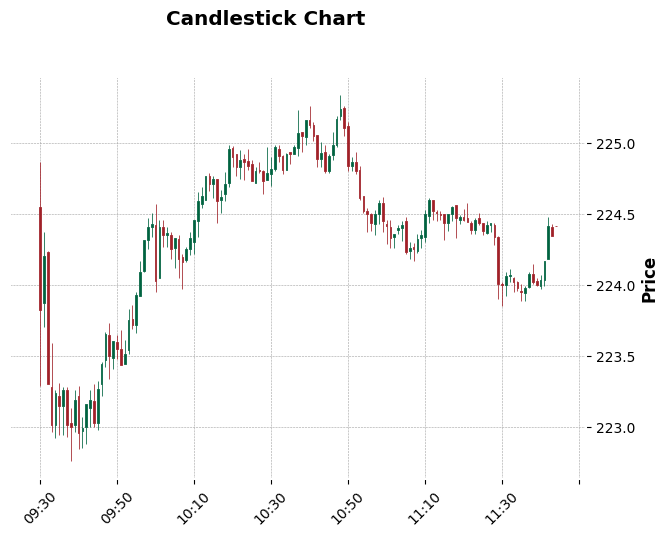

In [4]:
import mplfinance as mpf
# Inspect the DataFrame structure
#print(data.columns)
#print(data.head())

# Plot the candlestick chart

mpf.plot(data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')


You can get your data from any resource you want! 
However it is important to have the ohlcv format for analyis!
Note that:
1. The ohlcv format is a short for open-high-low-close-volume. 
2. date is always required, while each ohlcv values are optional - however they play a key role for the model! 
3. ohlcv can be provided by float, Decimal and str representing number, but these are always stored as Decimal.


For technical analysis we utilize the stock-indicators library.

First we have to format the data :



In [5]:
# Suppose that you have dataframe like the below.
#             date    open    high     low   close     volume
# 0     2018-12-31  244.92  245.54  242.87  245.28  147031456
# 1     2018-12-28  244.94  246.73  241.87  243.15  155998912
# 2     2018-12-27  238.06  243.68  234.52  243.46  189794032
# ...          ...     ...     ...     ...     ...        ...

from stock_indicators import Quote


print(data.columns)

print(data.head())

def get_historical_quotes(data):
    quotes_list = [
        Quote(d,o,h,l,c,v) 
        for d,o,h,l,c,v 
        in zip(data.index, data['Open'], data['High'], data['Low'], data['Close'], data['Volume'])
    ]
    return quotes_list

# Example: Get the historical quotes for the data
quotes = get_historical_quotes(data)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-08-15 09:30:00-04:00  224.550003  224.869995  223.285004  223.820007   
2024-08-15 09:31:00-04:00  223.869995  224.369995  223.699997  224.205902   
2024-08-15 09:32:00-04:00  224.229996  224.240005  223.300003  223.300003   
2024-08-15 09:33:00-04:00  223.280502  223.589905  222.960007  223.014999   
2024-08-15 09:34:00-04:00  223.014999  223.259995  222.919998  223.240005   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-08-15 09:30:00-04:00  2014142        0.0           0.0  
2024-08-15 09:31:00-04:00   346879        0.0           0.0  
2024-08-15 09:32:00-04:00   204553        0.0           0.0  
2024-08-15 09:33:00-04:00   209298        0.0          

Then we can try to abuse a simple movinge average indicator

In [25]:
from stock_indicators import indicators
from decimal import Decimal as PyDecimal
from stock_indicators import CandlePart


# fetch historical quotes from your feed (your method)
quotes = get_historical_quotes(data)

# Log the quotes
def log(quotes):
    for q in quotes:
        print(f"Quote on {q.date.time()} - O:{q.open}, H:{q.high}, L:{q.low}, C:{q.close}, V:{q.volume}")

#log(quotes)


# calculate 20-period SMA
results = indicators.get_sma(quotes, 20).remove_warmup_periods()
#for i in range(len(results)):
#    print(f"SMA on {quotes[i].date.time()} - {results[i].sma}")

# calculate 20-period EMA
ema = indicators.get_ema(quotes, 20, CandlePart.OHLC4).remove_warmup_periods()
#for i in range(len(ema)):
#    print(f"EMA on {quotes[i].date.time()} - {ema[i].ema}")

Now to plot the indicators on the chart


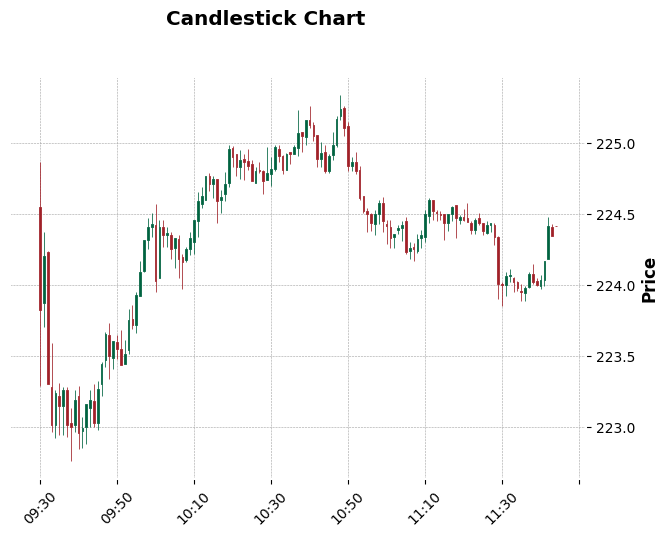

AttributeError: 'SMAResults' object has no attribute 'sma'

In [29]:
mpf.plot(data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')
